In [235]:
import pandas as pd
import numpy as np

In [236]:
data = pd.read_csv("bengaluru_house_prices.csv")

In [237]:
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [238]:
data.shape

(13320, 9)

In [239]:
data = data.drop(["area_type", "society", "balcony", "availability"], axis="columns")
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [240]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [241]:
data = data.dropna()
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [242]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [243]:
data["bhk"] = data["size"].apply(lambda x: int(x.split(" ")[0]))

In [244]:
data.drop(["size"], axis="columns")

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [245]:
data["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [246]:
data = data[data.bhk < 16]
data.shape

(13241, 6)

In [247]:
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [248]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [249]:
data[~data["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [250]:
def covert_data(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [251]:
data["total_sqft"] = data["total_sqft"].apply(covert_data)

In [252]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [253]:
dat = data.dropna()

In [254]:
data["price_per_sqft"] = data["price"] * 100000 / data["total_sqft"]
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [255]:
s = data["location"].value_counts()
less_than_10 = s[s <= 10]

In [256]:
data.location = data.location.apply(lambda x: "other" if x in less_than_10 else x)

In [257]:
data.location.nunique()

242

In [258]:
data = data[~(data["total_sqft"] / data["bhk"] < 300)]
data.shape

(12501, 7)

In [259]:
data.price_per_sqft.describe()

count     12455.000000
mean       6308.567740
std        4168.288380
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [260]:
data = data[
    (data.price_per_sqft >= data.price_per_sqft.quantile(0.10))
    & (data.price_per_sqft <= data.price_per_sqft.quantile(0.99))
]

In [261]:
data.price_per_sqft.describe()

count    11096.000000
mean      6402.781760
std       2954.291463
min       3500.000000
25%       4512.092469
50%       5508.268241
75%       7083.333333
max      21731.936018
Name: price_per_sqft, dtype: float64

In [262]:
data.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'Whitefield', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'other', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Varthur', 'Bommanahalli', 'Doddathoguru', 'Gunjur',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'ISRO Layout', 'Garudachar Palya', 'EPIP Zone', 'Dasanapura',
       'Kasavanhalli', 'Sanjay nagar', 'Domlur', 'Kengeri',
       'Sarjapura - Attibele Road', 'Yeshwanthpur', 'Nagarbhavi',
       'Devanahalli', 'Ramamurthy Nagar', 'Sarjapur  Road

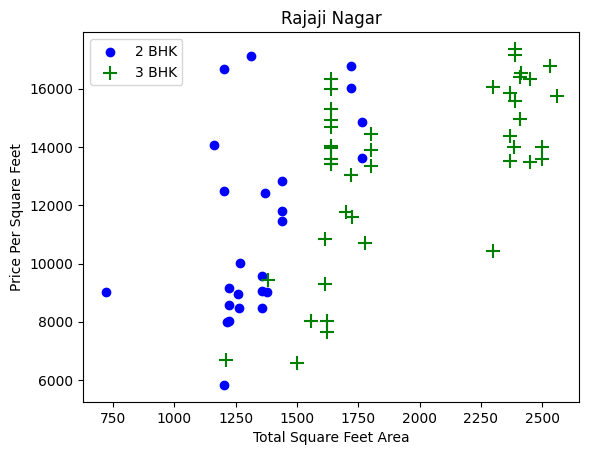

In [263]:
from matplotlib import pyplot as plt


def scatter(data, location):
    bhk2 = data[(data.location == location) & (data.bhk == 2)]
    bhk3 = data[(data.location == location) & (data.bhk == 3)]
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color="blue", label="2 BHK")
    plt.scatter(
        bhk3.total_sqft,
        bhk3.price_per_sqft,
        marker="+",
        color="green",
        label="3 BHK",
        s=90,
    )
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()


scatter(data, "Rajaji Nagar")

In [264]:
import numpy as np


def remove_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0],
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats["count"] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_per_sqft < (stats["mean"])].index.values,
                )
    return df.drop(exclude_indices, axis="index")

In [265]:
data = remove_outliers(data)

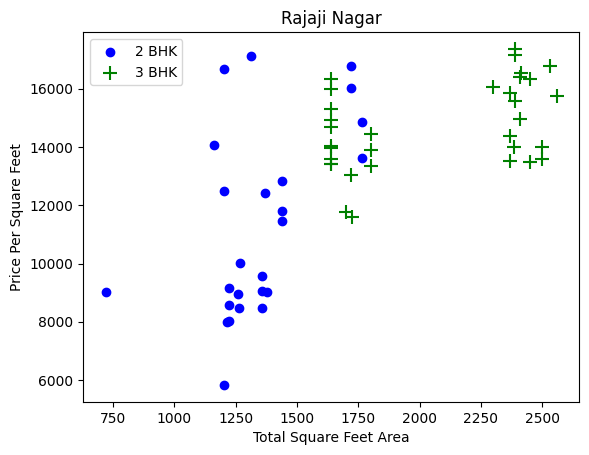

In [266]:
scatter(data, "Rajaji Nagar")

Text(0, 0.5, 'count')

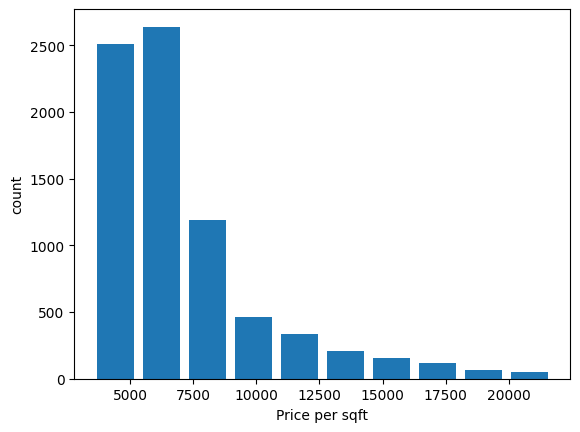

In [267]:
plt.hist(data.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("count")

In [268]:
data.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 14., 12., 13.])

In [269]:
data = data[~(data.bath > data.bhk + 2)]
data = data.drop(["size", "price_per_sqft"], axis="columns")
data

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
...,...,...,...,...,...
13312,Bellandur,1262.0,2.0,47.00,2
13314,Green Glen Layout,1715.0,3.0,112.00,3
13316,other,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [270]:
dummies_data = pd.get_dummies(data.location, dtype=int)

In [271]:
data = pd.concat(
    [
        data.drop(["location"], axis="columns"),
        dummies_data.drop(["other"], axis="columns"),
    ],
    axis="columns",
)
data.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
x = data.drop(["price"], axis="columns")
y = data.price

In [273]:
x_train

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
11919,1400.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12305,1454.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12883,1245.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6414,1650.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7588,3500.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12880,883.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3736,3785.0,6.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11358,2500.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550,3450.0,5.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
x_test

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
3722,1865.0,4.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,600.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9875,1723.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9914,1203.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8511,3596.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8451,1491.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2855,900.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11825,1310.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9802,1320.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10015,3700.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=25)

lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.5987949251621576

In [276]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.80933917, 0.74554572, 0.78089559, 0.78391005, 0.76216767])

In [277]:
import numpy as np

In [278]:
loc = np.where(x.columns == "1st Block Jayanagar")[0]
x = np.zeros(len(x.columns))
x[0] = 900
x[1] = 2
x[2] = 4
if loc >= 0:
    x[loc] = 1
lr.predict([x])[0]

C:\Users\Subh Patwari\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


128.27514260716546

In [279]:
import pickle

with open("bengaluru_house_prices.pickel", "wb") as f:
    pickle.dump(lr, f)

In [280]:
import json

In [281]:
columns = {"data_columns": [col.lower() for col in x.columns]}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'